In [1]:
import platform 
import os

analysis = 'elastic_net/regression'
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    data_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/composite_analyses/non_fl_vtas_yeo_rois/yeo_rois_with_clinical_data_for_regression.csv'
    out_dir = os.path.join(os.path.dirname(data_path), f'{analysis}')
    #out_dir = r'path to out dir here'
    
    print('I have set pathnames in the Mac style')
    print('I will save to :', out_dir)
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    data_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\addbs_vta_to_memory_net_maxima\linear_regression_addbs_vta_to_memory_net_maxima\prepared_data.csv'
    out_dir = rf'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\addbs_vta_to_memory_net_maxima\linear_regression_addbs_vta_to_memory_net_maxima\{analysis}'
    #out_dir = r'path to out dir here'

    print('I have set pathnames in the Windows style')

I have set pathnames in the Mac style
I will save to : /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/composite_analyses/non_fl_vtas_yeo_rois/elastic_net/regression


In [2]:
import numpy as np
import pandas as pd
# Load data into a pandas DataFrame 
df = pd.read_csv(data_path)

#Remove columns
try:
    df.pop('% Change from baseline (CDR)')
    df.pop('Baseline CDR (sum of squares)')
    df.pop('Unnamed: 0')
    df.pop('Patient # CDR, ADAS')
    df.pop('Randomization Arm')
    df.pop('Age')
    df.pop('baseline')
    # df.pop('Somatomotor')
    # df.pop('Dorsal_Attention')
    # df.pop('Visual')
    # df.pop('Somatomotor')

except:
    print('cannot pop')

#Remove outlier
outlier_index=[11, 47, 48, 49]
df = df.drop(index=outlier_index)

#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df[df.columns] = scaler.fit_transform(df[df.columns])

display(df)

,perc_improvement,Visual,Somatomotor,Dorsal_Attention,Ventral_Attention,Limbic,Frontoparietal,Default
0,0.317537,1.019399,1.220525,0.960058,-0.289609,0.892577,-1.203298,-0.870913
1,0.014153,0.638366,1.426586,0.582953,0.345720,1.258792,-1.064982,-0.838260
2,-0.850871,0.697645,0.936866,0.292497,-0.259161,0.742521,-0.888963,-0.357956
3,-1.875980,0.759000,-0.152994,0.795321,-1.031082,0.687017,-0.652573,-0.820190
4,0.539000,-1.296568,-2.020867,0.651445,0.584220,-0.218303,1.483300,-0.706137
5,-0.028462,0.968892,0.698389,0.701764,-0.741732,0.620151,-0.977517,-0.624744
6,0.440311,-0.571690,-1.845639,1.131388,-0.022369,0.486658,0.851218,-1.087674
7,0.160349,-1.554518,-1.656486,-0.356505,0.508220,-0.153153,1.334407,0.340674
8,0.134589,-0.260837,0.686117,-0.844494,0.297232,0.555517,-0.188558,0.768500
9,-0.966009,0.464851,0.335731,0.076157,-0.671473,0.513575,-0.548891,0.004363


In [3]:
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from calvin_utils.statistical_measurements import calculate_vif
from calvin_utils.statistical_functions import generate_interaction_features

# Split data into features and target variable
df1 = df.copy()
y = df1.pop('perc_improvement')
X = df1

#Generate interaction effects
X_interactions = generate_interaction_features(X)
# X = X_interactions

# Create an elastic net regression model
elastic_net = ElasticNet(fit_intercept=True)

# Set up the hyperparameter grid
param_grid = {
    'alpha': np.linspace(0.01, 1, 10),  # range of regularization strength
    'l1_ratio': np.linspace(0.01, 1, 10)  # range of l1_ratio
}

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(
    elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error'
)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Train the optimal model
lin_reg = sm.OLS(y, X)
optimal_model = lin_reg.fit_regularized(alpha=best_alpha, L1_wt=best_l1_ratio, refit=True)

# Print the summary of the optimal model
print(f'L1 Weight: {best_l1_ratio}, alpha level: {best_alpha} \n \n {calculate_vif(X)}')


L1 Weight: 0.01, alpha level: 0.78 
 
             features         VIF
0             Visual   76.052660
1        Somatomotor   79.658042
2   Dorsal_Attention   13.063846
3  Ventral_Attention   54.729185
4             Limbic   19.535509
5     Frontoparietal  393.054324
6            Default   15.009649


In [4]:
print(optimal_model.summary())


                                 OLS Regression Results                                
Dep. Variable:       perc_improvement   R-squared (uncentered):                   0.195
Model:                            OLS   Adj. R-squared (uncentered):              0.050
Method:                 Least Squares   F-statistic:                              1.348
Date:                Mon, 27 Feb 2023   Prob (F-statistic):                       0.254
Time:                        16:34:51   Log-Likelihood:                         -60.286
No. Observations:                  46   AIC:                                      134.6
Df Residuals:                      39   BIC:                                      147.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [5]:
display(optimal_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       perc_improvement   R-squared (uncentered):                   0.195
Model:                            OLS   Adj. R-squared (uncentered):              0.050
Method:                 Least Squares   F-statistic:                              1.348
Date:                Mon, 27 Feb 2023   Prob (F-statistic):                       0.254
Time:                        16:34:51   Log-Likelihood:                         -60.286
No. Observations:                  46   AIC:                                      134.6
Df Residuals:                      39   BIC:                                      147.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Visual               -0.1087      1.253     -0.087      0.931      -2.643       2.426
Somatomotor          -0.9371      1.282     -0.731      0.469      -3.531       1.657
Dorsal_Attention      0.7408      0.519      1.427      0.162      -0.310       1.791
Ventral_Attention     0.9902      1.063      0.932      0.357      -1.160       3.140
Limbic               -0.4283      0.635     -0.674      0.504      -1.713       0.856
Frontoparietal       -1.6371      2.849     -0.575      0.569      -7.399       4.125
Default               1.0683      0.557      1.919      0.062      -0.058       2.194
==============================================================================
Omnibus:                       15.935   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.173
Skew:                          -1.090   Prob(JB):                     1.53e-05
Kurtosis:                       5.611   Cond. No.                         48.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

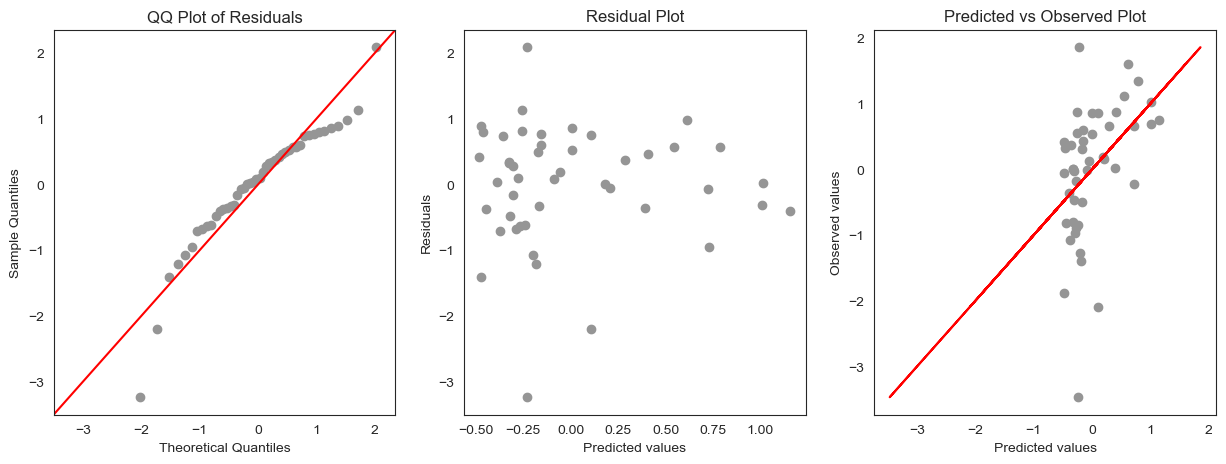

In [6]:
## Generate Diagnostics
from calvin_utils.statistical_measurements import model_diagnostics
cls = model_diagnostics(optimal_model)


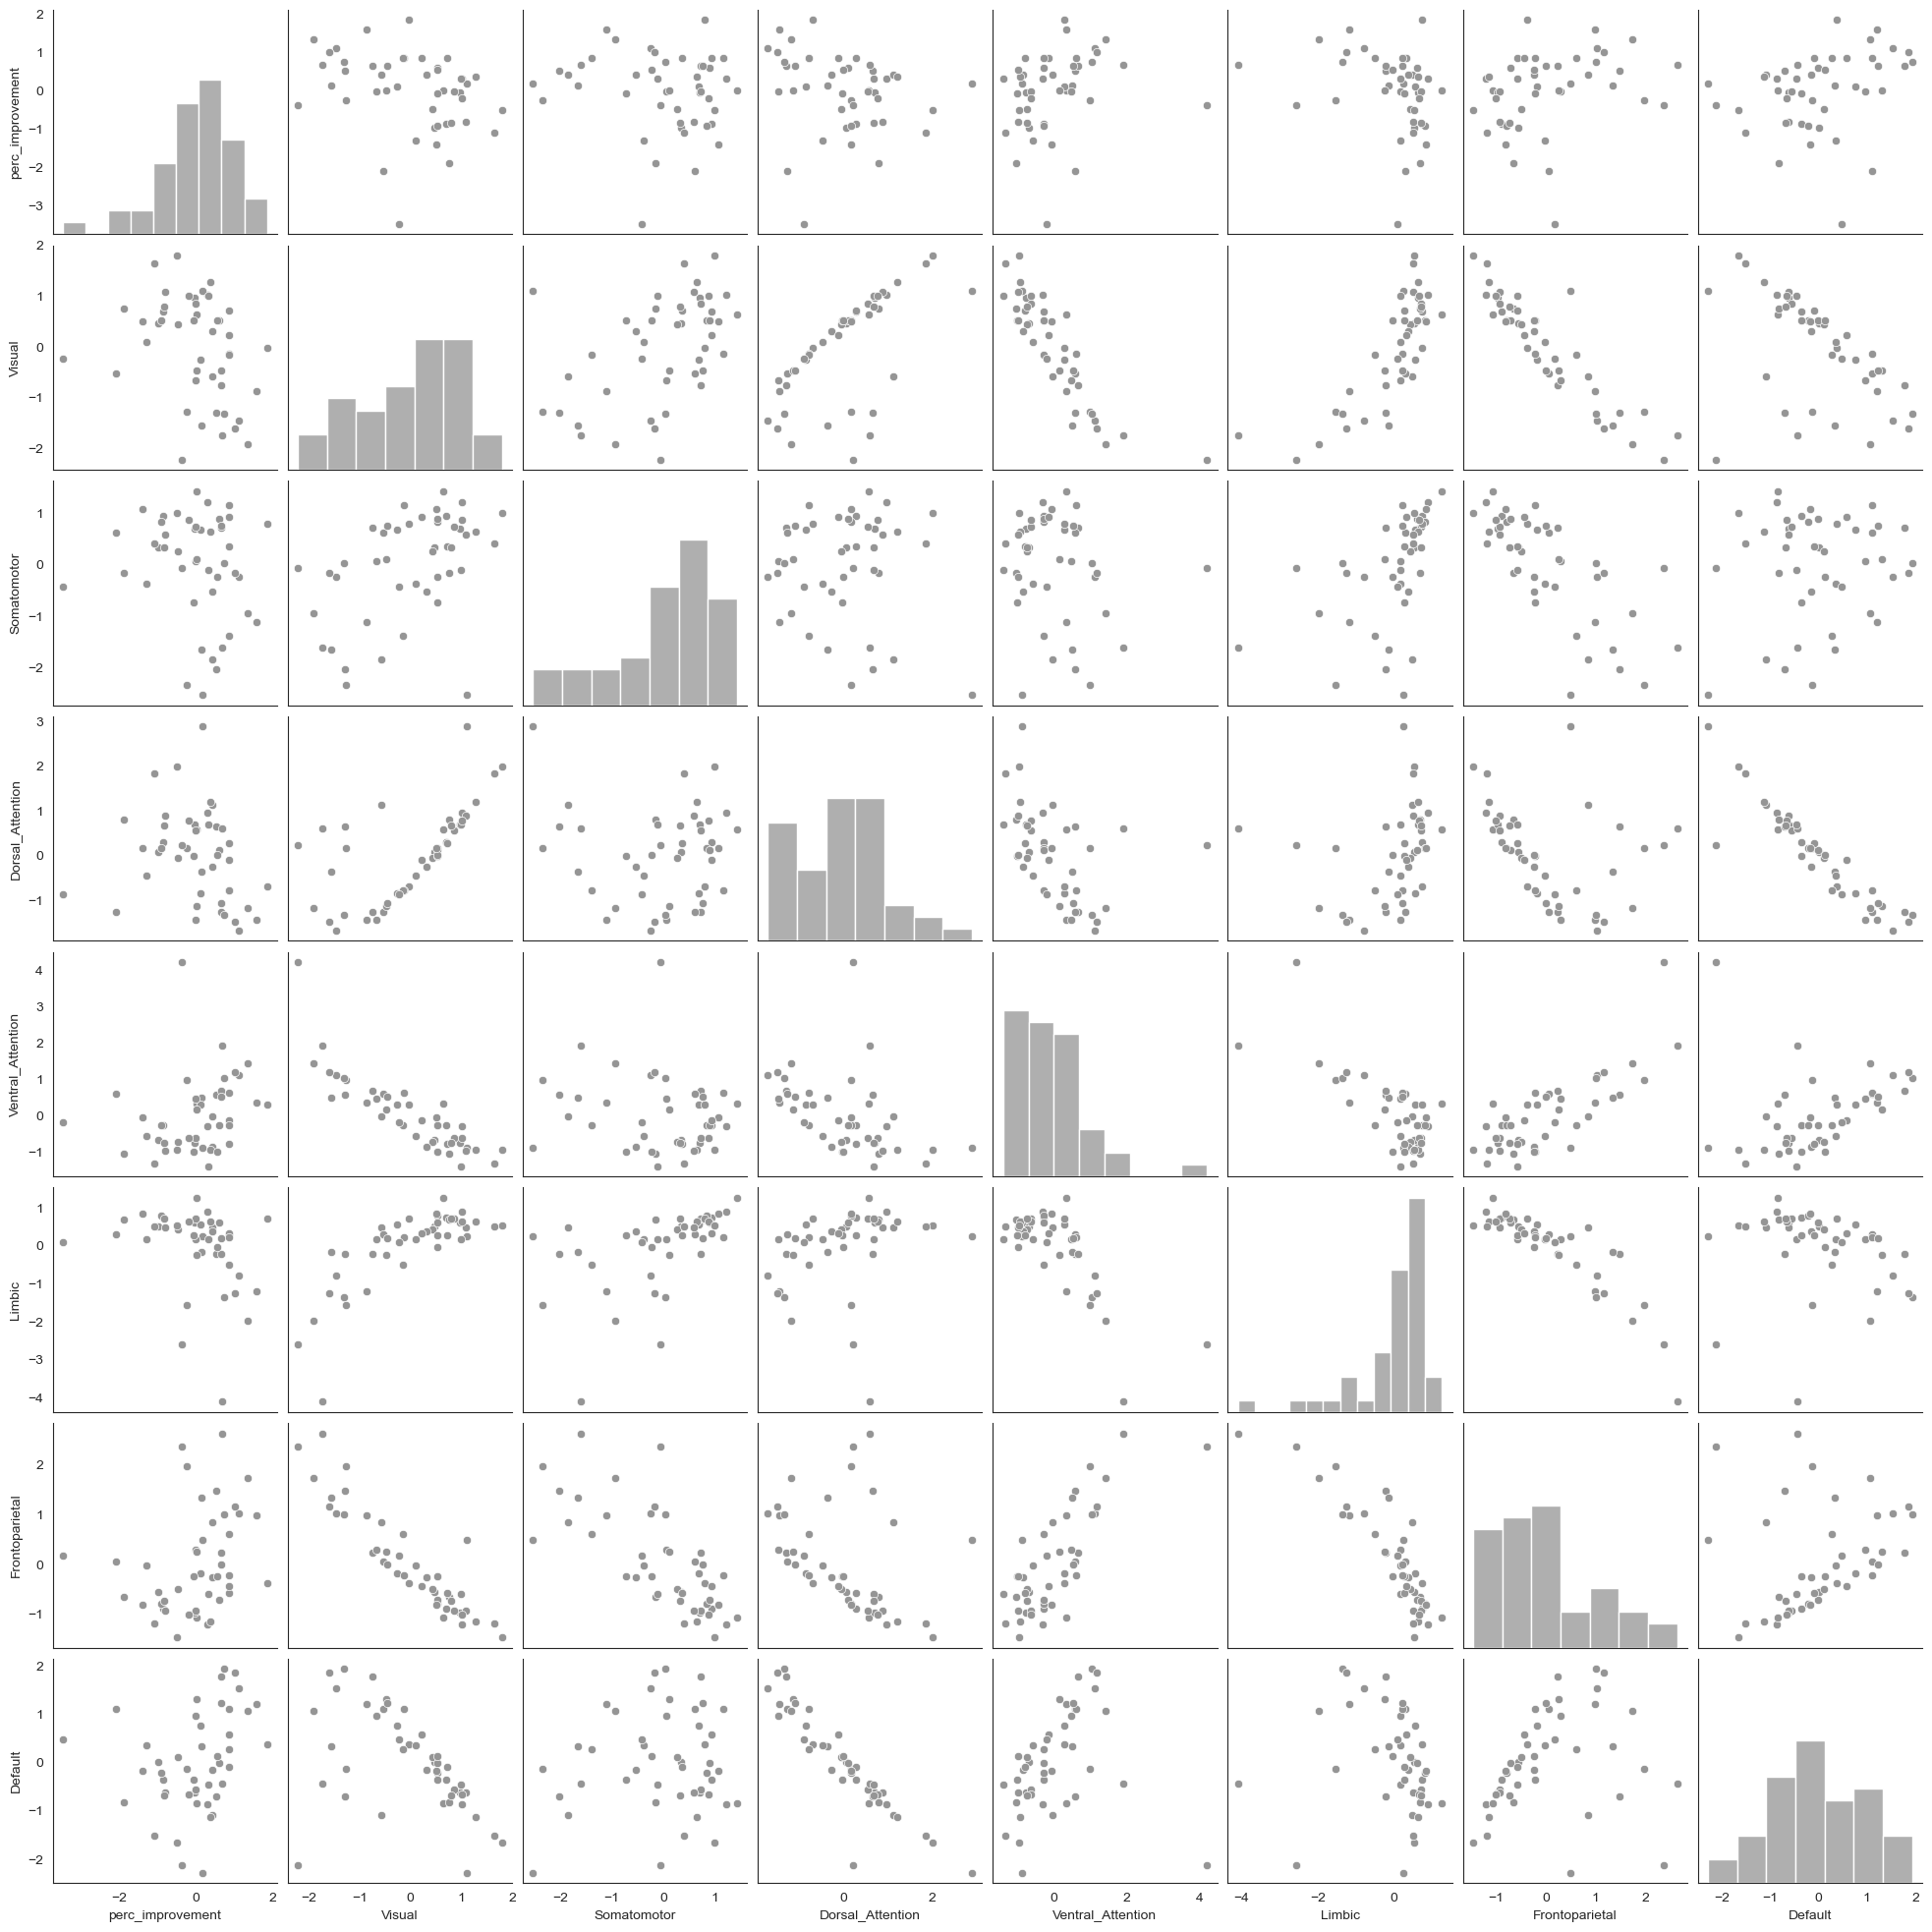

In [7]:
import seaborn as sns

sns.pairplot(df)